<a href="https://colab.research.google.com/github/Josemm17/Actividad-5-Extracci-n-de-caracter-sticas/blob/main/Actividad_5_(Extracci%C3%B3n_de_Caracter%C3%ADsticas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [2]:
df=pd.read_excel("microretailer_mit_lift_lab.xlsx")
df.isnull().sum()

,0
_record_id,0
_title,0
_server_updated_at,0
_updated_by,0
_geometry,0
...,...
234_willingness_participate_workshop,73
318_shopkeeper_name,123
319_shopkeepers_last_name,125
236_whatsapp,129


In [3]:
#Eliminar valores nulos
df1=df.fillna(method="ffill")
df1=df1.fillna(method="bfill")
df1.isnull().sum()

<ipython-input-3-8966028659bc>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1=df.fillna(method="ffill")
<ipython-input-3-8966028659bc>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1=df1.fillna(method="bfill")


,0
_record_id,0
_title,0
_server_updated_at,0
_updated_by,0
_geometry,0
...,...
234_willingness_participate_workshop,0
318_shopkeeper_name,0
319_shopkeepers_last_name,0
236_whatsapp,0


<Figure size 1500x800 with 0 Axes>

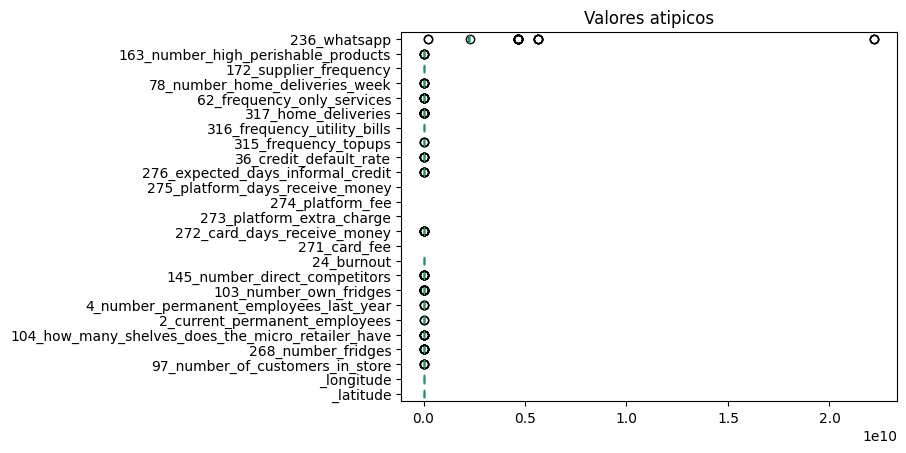

In [4]:
#Graficar outliers
fig=plt.figure(figsize=(15,8))
df1.plot(kind="box", vert=False)
plt.title("Valores atipicos")
plt.show()

In [5]:
#Retirar columnas no numericas
data2=df1.select_dtypes(include=['number'])
data2.isnull().sum()

,0
_latitude,0
_longitude,0
97_number_of_customers_in_store,0
268_number_fridges,0
104_how_many_shelves_does_the_micro_retailer_have,0
2_current_permanent_employees,0
4_number_permanent_employees_last_year,0
103_number_own_fridges,0
145_number_direct_competitors,0
24_burnout,0


In [6]:
#limpiar valores nulos
y=data2
limite_sup=y.mean()+3*y.std()
limite_inf=y.mean()-3*y.std()
print("limte superior permitido", limite_sup)
print("limte inferior permitido", limite_inf)

limte superior permitido _latitude                                            1.911117e+01
_longitude                                          -9.809030e+01
97_number_of_customers_in_store                      6.591777e+00
268_number_fridges                                   1.020693e+01
104_how_many_shelves_does_the_micro_retailer_have    5.581292e+01
2_current_permanent_employees                        1.371533e+01
4_number_permanent_employees_last_year               1.242350e+01
103_number_own_fridges                               8.984091e+00
145_number_direct_competitors                        1.382033e+01
24_burnout                                           1.037826e+01
271_card_fee                                                  NaN
272_card_days_receive_money                          3.621305e+00
273_platform_extra_charge                                     NaN
274_platform_fee                                              NaN
275_platform_days_receive_money                    

In [7]:
data3=data2[(y<=limite_sup)&(y>=limite_inf)]
data3

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,1.0,3.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,1.0,4.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,NaN,2.224524e+09
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,1.0,0.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,NaN,2.224524e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,1.0,4.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,1.0,0.0,4.0,...,15.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,NaN,5.0,0.0,2.212380e+09
167,19.042794,-98.193802,1.0,5.0,5.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,NaN,5.0,0.0,2.212380e+09
168,19.042809,-98.193439,3.0,1.0,1.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,NaN,5.0,0.0,2.212380e+09
169,19.042558,-98.193818,0.0,1.0,1.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,NaN,5.0,0.0,2.212380e+09


In [8]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,1.0,3.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,1.0,4.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,6.7,2.224524e+09
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,1.0,0.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,6.7,2.224524e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,1.0,4.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,1.0,0.0,4.0,...,15.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,3.0,5.0,0.0,2.212380e+09
167,19.042794,-98.193802,1.0,5.0,5.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,3.0,5.0,0.0,2.212380e+09
168,19.042809,-98.193439,3.0,1.0,1.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,3.0,5.0,0.0,2.212380e+09
169,19.042558,-98.193818,0.0,1.0,1.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,3.0,5.0,0.0,2.212380e+09


In [ ]:
#rectificar valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

,0
_latitude,0
_longitude,0
97_number_of_customers_in_store,0
268_number_fridges,0
104_how_many_shelves_does_the_micro_retailer_have,0
2_current_permanent_employees,0
4_number_permanent_employees_last_year,0
103_number_own_fridges,0
145_number_direct_competitors,0
24_burnout,0


In [9]:
#juntar el df limpio con las variables numericas
df_no_numerico = df.select_dtypes(exclude=['number'])
df_completo= pd.concat([data_clean, df_no_numerico], axis=1)
df_completo

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,1.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,1.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,1.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,1.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,1.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,4.0,2.0,2.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,19.042794,-98.193802,1.0,5.0,5.0,4.0,2.0,2.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,19.042809,-98.193439,3.0,1.0,1.0,4.0,2.0,2.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,19.042558,-98.193818,0.0,1.0,1.0,4.0,2.0,2.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Extraer características de análisis univariado
freq_tbl(df_completo)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

Text(0.5, 1.0, 'Tipo de tienda')

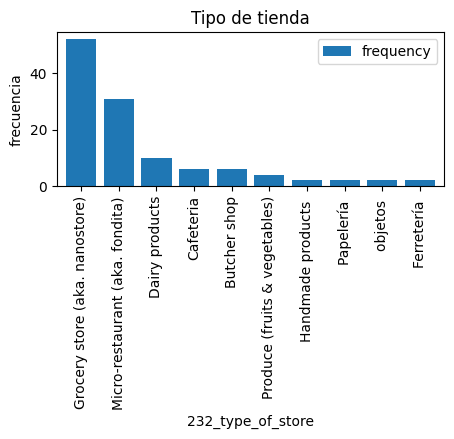

In [11]:
table1=freq_tbl(df_completo["232_type_of_store"])
filtro1=table1[table1["frequency"]>1]
filtro1_index=filtro1.set_index("232_type_of_store")
filtro1_index_freq=filtro1_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro1_index_freq.plot(kind="bar", width=.8, figsize=(5,2))
plt.ylabel("frecuencia")
plt.title("Tipo de tienda")


Text(0.5, 1.0, 'Dispositivos')

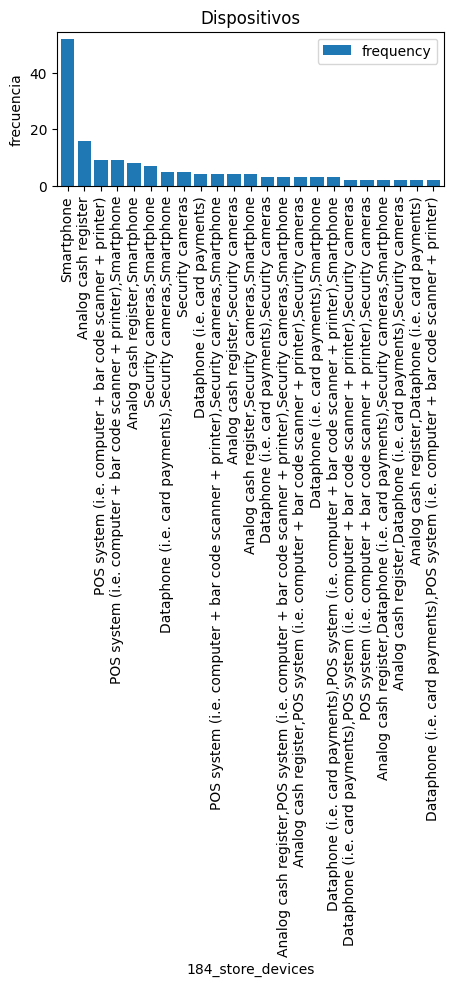

In [12]:
table2=freq_tbl(df_completo["184_store_devices"])
filtro2=table2[table2["frequency"]>1]
filtro2_index=filtro2.set_index("184_store_devices")
filtro2_index_freq=filtro2_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro2_index_freq.plot(kind="bar", width=.8, figsize=(5,2))
plt.ylabel("frecuencia")
plt.title("Dispositivos")

In [ ]:
table3=freq_tbl(df_completo["102_does_the_micro_retailer_sells_fresh_products_"])
filtro3=table3[table3["frequency"]>1]
filtro3_index=filtro3.set_index("102_does_the_micro_retailer_sells_fresh_products_")
filtro3_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("El comerciante vende productos frescos?")

Text(0.5, 1.0, 'El comerciante exhibe productos fuera?')

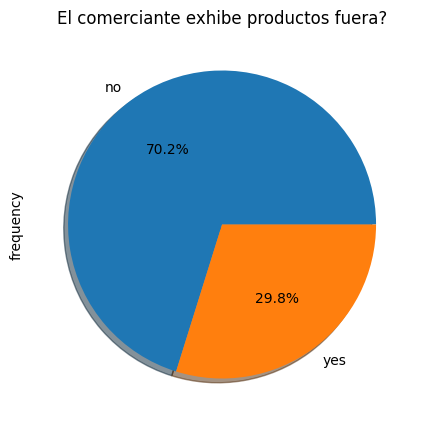

In [14]:
table4=freq_tbl(df_completo["99_does_the_micro_retailer_exhibits_products_outside_"])
filtro4=table4[table4["frequency"]>1]
filtro4_index=filtro4.set_index("99_does_the_micro_retailer_exhibits_products_outside_")
filtro4_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("El comerciante exhibe productos fuera?")

Text(0.5, 1.0, 'Como registra sus inventarios?')

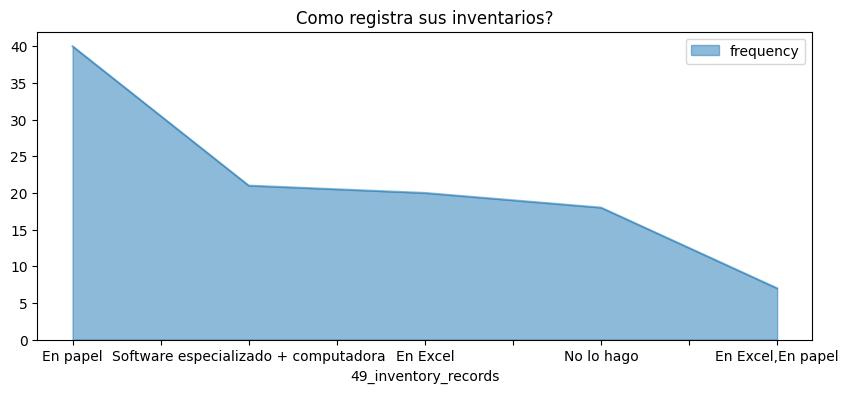

In [15]:
table5=freq_tbl(df_completo["49_inventory_records"])
filtro5=table5[table5["frequency"]>1]
filtro5_index=filtro5.set_index("49_inventory_records")
filtro5_index_freq=filtro5_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro5_index_freq.plot(kind="area", figsize=(10,4), alpha=.5)
plt.title("Como registra sus inventarios?")

Text(0.5, 1.0, 'Como registra sus ventas?')

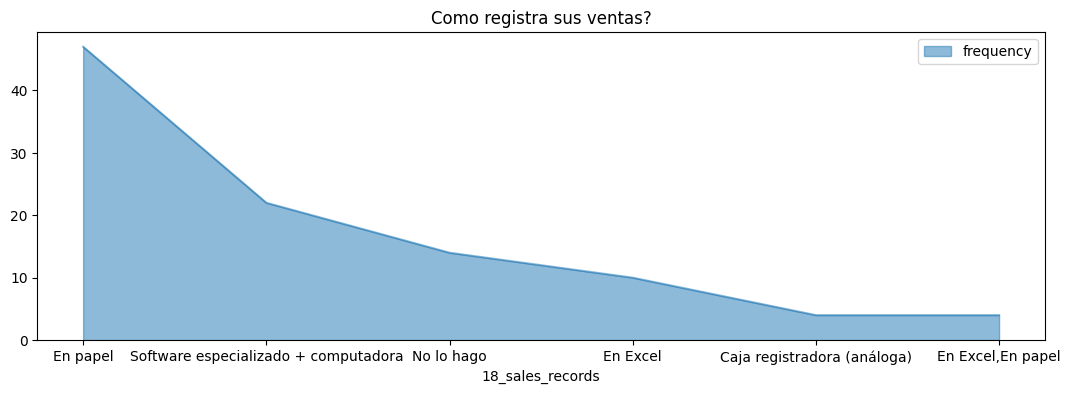

In [16]:
table6=freq_tbl(df_completo["18_sales_records"])
filtro6=table6[table6["frequency"]>1]
filtro6_index=filtro6.set_index("18_sales_records")
filtro6_index_freq=filtro6_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro6_index_freq.plot(kind="area", figsize=(13,4), alpha=.5)
plt.title("Como registra sus ventas?")


Text(0.5, 1.0, 'Canales de venta:')

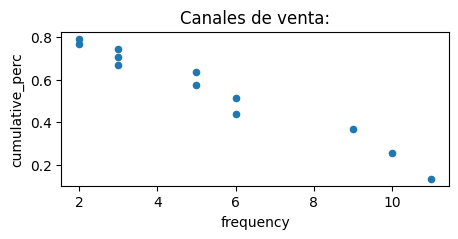

In [17]:
table7=freq_tbl(df_completo["210_sales_channels"])
filtro7=table7[table7["frequency"]>1]
filtro7_index=filtro7.set_index("210_sales_channels")
filtro7_index.plot("frequency","cumulative_perc", kind="scatter", figsize=(5,2))
plt.title("Canales de venta:")

Text(0.5, 1.0, 'Metodos de pago:')

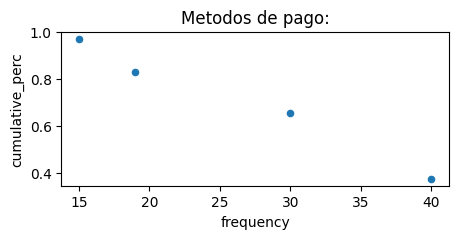

In [18]:
table8=freq_tbl(df_completo["189_payment_methods"])
filtro8=table8[table8["frequency"]>1]
filtro8_index=filtro8.set_index("189_payment_methods")
filtro8_index.plot("frequency","cumulative_perc", kind="scatter", figsize=(5,2))
plt.title("Metodos de pago:")

Text(0.5, 1.0, 'Herramientas de planificación de venta:')

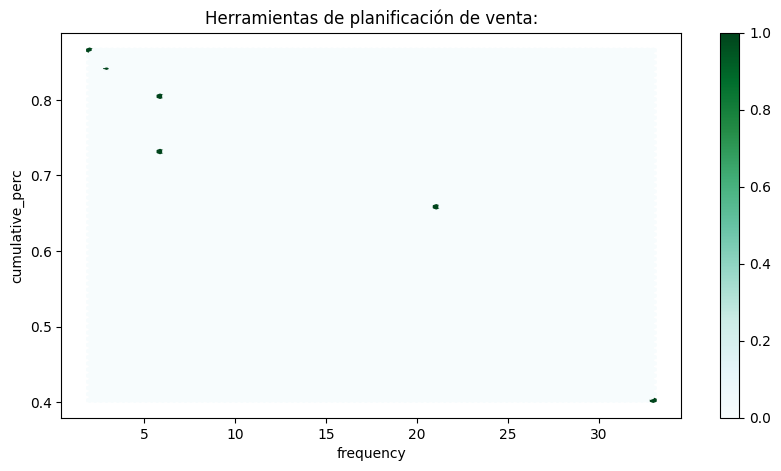

In [20]:
table9=freq_tbl(df_completo["193_sales_planning_tools"])
filtro9=table9[table9["frequency"]>1]
filtro9_index=filtro9.set_index("193_sales_planning_tools")
filtro9_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))
plt.title("Herramientas de planificación de venta:")

Text(0.5, 1.0, 'Herramientas de planificación de venta:')

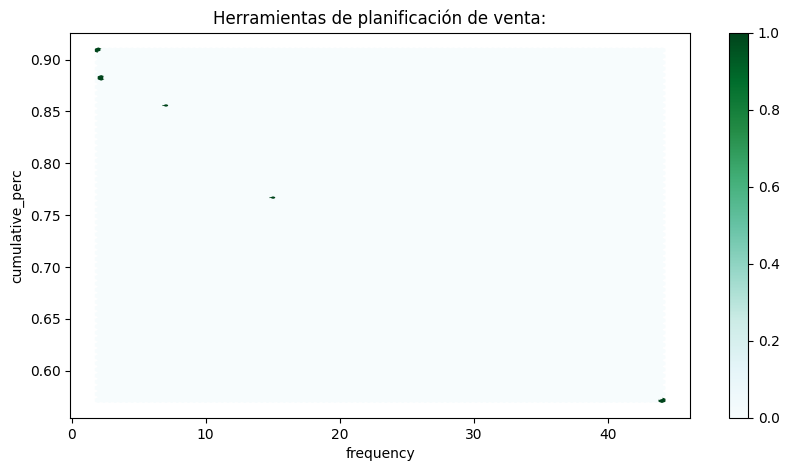

In [21]:
table10=freq_tbl(df_completo["60_services"])
filtro10=table10[table10["frequency"]>1]
filtro10_index=filtro10.set_index("60_services")
filtro10_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))
plt.title("Herramientas de planificación de venta:")

Text(0.5, 1.0, 'El comerciante tiene una ventana enrejada?')

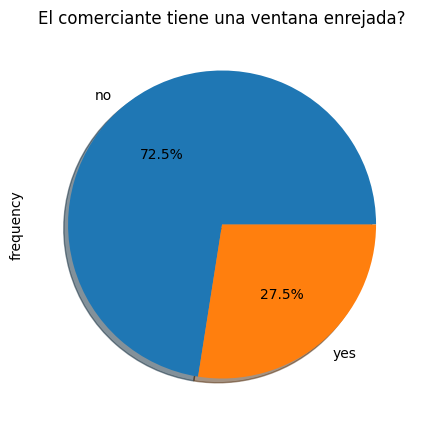

In [23]:
table11=freq_tbl(df_completo["108_does_the_micro_retailer_has_a_barred_window_"])
filtro11=table11[table11["frequency"]>1]
filtro11_index=filtro11.set_index("108_does_the_micro_retailer_has_a_barred_window_")
filtro11_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("El comerciante tiene una ventana enrejada?")

Text(0.5, 1.0, 'Número de refrigeradores')

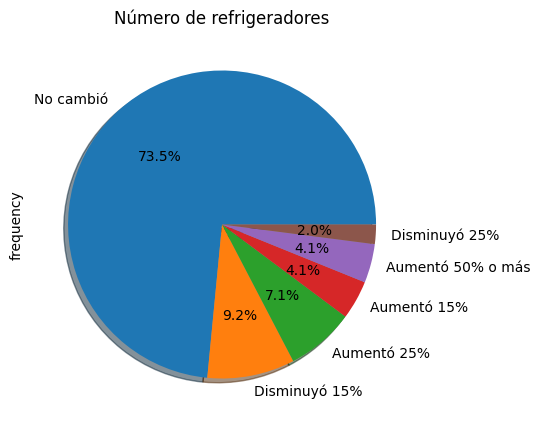

In [28]:
table12=freq_tbl(df_completo["5_change_store_space_last_year"])
filtro12=table12[table12["frequency"]>1]
filtro12_index=filtro12.set_index("5_change_store_space_last_year")
filtro12_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Cambio en el espacio de la tienda del año pasado:")

Text(0.5, 1.0, 'Cambio en el salario promedio de los trabajadores del año pasado:')

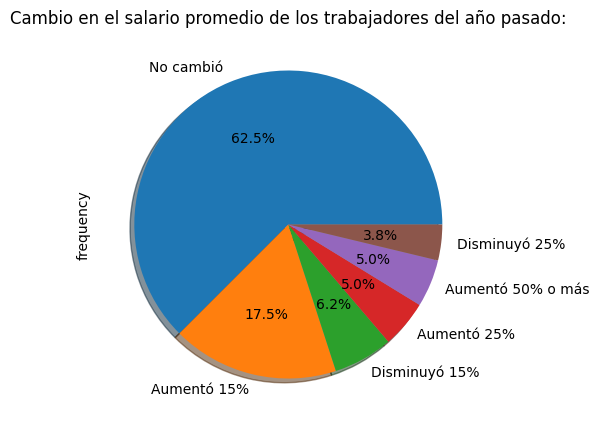

In [30]:
table13=freq_tbl(df_completo["6_change_employees_average_salary_last_year"])
filtro13=table13[table13["frequency"]>1]
filtro13_index=filtro13.set_index("6_change_employees_average_salary_last_year")
filtro13_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Cambio en el salario promedio de los trabajadores del año pasado:")

Text(0.5, 1.0, 'Revisa sus finanzas mensualmente?')

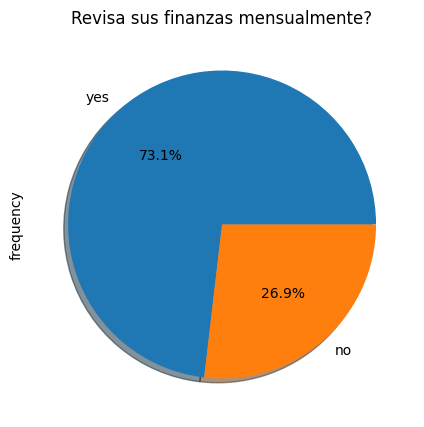

In [31]:
table14=freq_tbl(df_completo["20_reviews_finances_monthly"])
filtro14=table14[table14["frequency"]>1]
filtro14_index=filtro14.set_index("20_reviews_finances_monthly")
filtro14_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Revisa sus finanzas mensualmente?")

Text(0.5, 1.0, 'Tiene conexión a internet?')

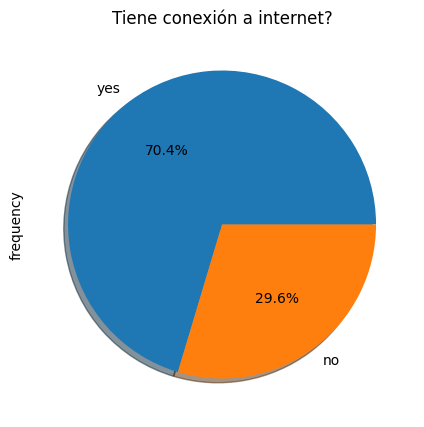

In [32]:
table15=freq_tbl(df_completo["186_internet_connection"])
filtro15=table15[table15["frequency"]>1]
filtro15_index=filtro15.set_index("186_internet_connection")
filtro15_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Tiene conexión a internet?")

Text(0.5, 1.0, 'Credito a los clientes?')

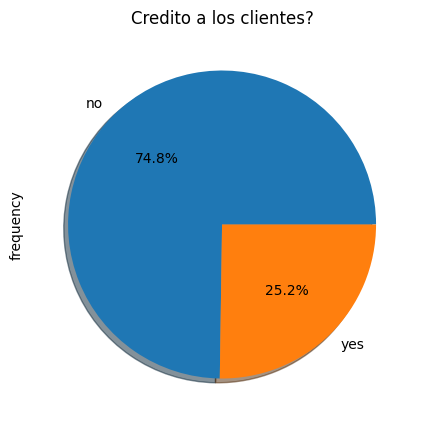

In [33]:
table16=freq_tbl(df_completo["33_credit_to_customers"])
filtro16=table16[table16["frequency"]>1]
filtro16_index=filtro16.set_index("33_credit_to_customers")
filtro16_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Credito a los clientes?")

Text(0.5, 1.0, 'Margen promedio de beneficios:')

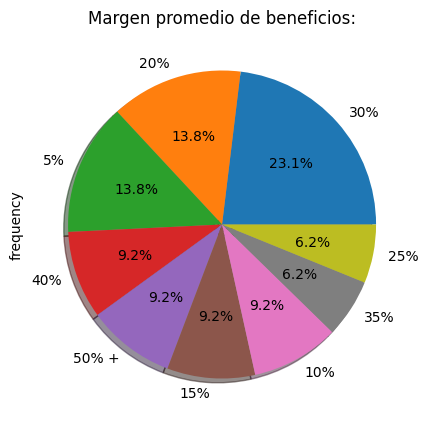

In [35]:
table17=freq_tbl(df_completo["38_average_margin_profits"])
filtro17=table17[table17["frequency"]>1]
filtro17_index=filtro17.set_index("38_average_margin_profits")
filtro17_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Margen promedio de beneficios:")

Text(0.5, 1.0, 'Está de acuerdo con las plataformas para ecommerce?')

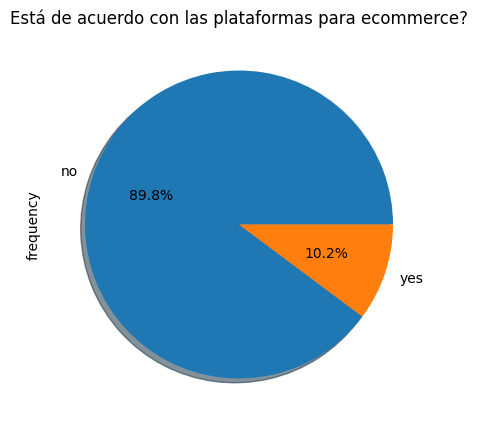

In [37]:
table18=freq_tbl(df_completo["227_agreement_ecommerce_platforms"])
filtro18=table18[table18["frequency"]>1]
filtro18_index=filtro18.set_index("227_agreement_ecommerce_platforms")
filtro18_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Está de acuerdo con las plataformas para ecommerce?")

Text(0.5, 1.0, 'Servicios que ofrece:')

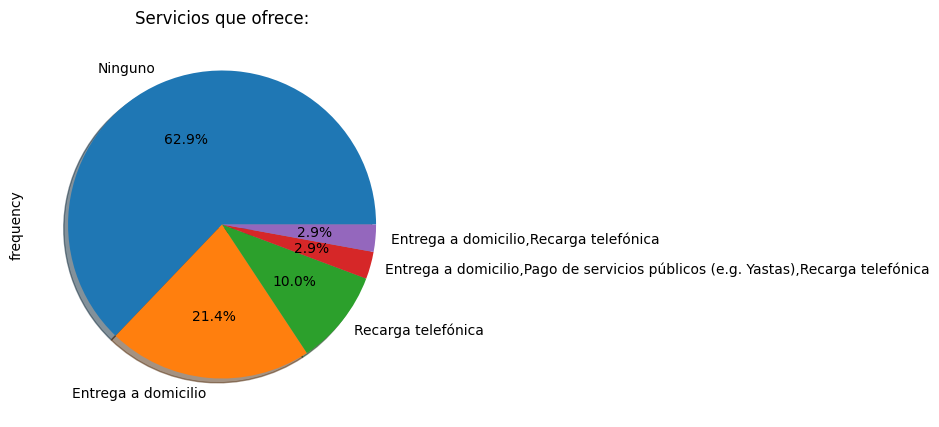

In [38]:
table19=freq_tbl(df_completo["60_services"])
filtro19=table19[table19["frequency"]>1]
filtro19_index=filtro19.set_index("60_services")
filtro19_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Servicios que ofrece:")

Text(0.5, 1.0, 'Metodos de pago con proveedores:')

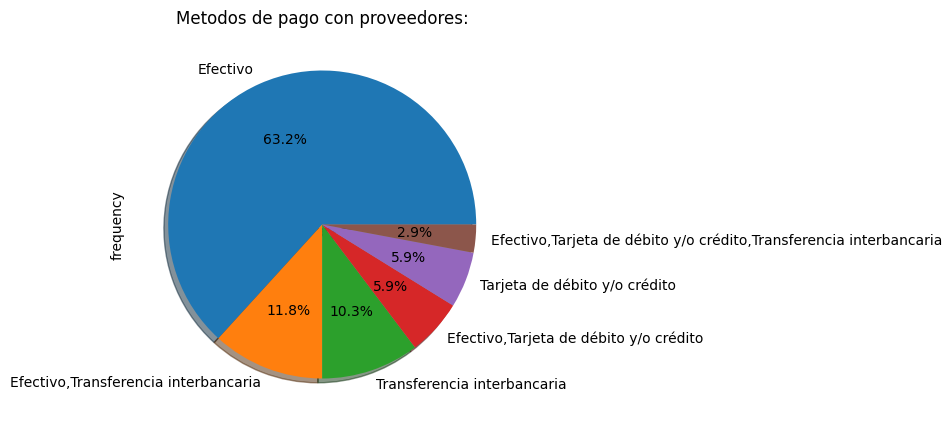

In [39]:
table19=freq_tbl(df_completo["277_payment_method_suppliers"])
filtro19=table19[table19["frequency"]>1]
filtro19_index=filtro19.set_index("277_payment_method_suppliers")
filtro19_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Metodos de pago con proveedores:")